Neural Networks
===============

A note on Literature
--------------------

A lot of the concepts in the text below on Neural Networks is inspired from

 * Rojas, R. (2013). _Neural networks: a systematic introduction_. Springer Science & Business Media.
  
  _(of course, you are not expected to read it for the exam)_

He is a Professor in the FU Berlin, and is nice enough to make his book freely available in the internet. You can find it [here](https://page.mi.fu-berlin.de/rojas/neural/). (In fact, the book is quite theoretical and not so much related to the more "hyped" parts of the topic nowadays.)

Because this topic is **so goddamn hyped** nowadays, it is possible to find all sorts of materials out there.
[I myself have a blog where I talk about it sometimes](http://jcbgamboa.github.io).
Some completely different take on the topic (that is quite interesting and easy to follow) are the videos of 3Blue1Brown
[here](https://www.youtube.com/watch?v=aircAruvnKk),
[here](https://www.youtube.com/watch?v=IHZwWFHWa-w) and
[here](https://www.youtube.com/watch?v=Ilg3gGewQ5U).

A little about the artificial neuron
----------------------------------

_(It is generally assumed that)_ The idea of an "artificial neuron" that would try to "resemble" the neurons in our head first appeared with [Warren Sturgis McCulloch](https://en.wikipedia.org/wiki/Warren_Sturgis_McCulloch) and [Walter_Pitts](https://en.wikipedia.org/wiki/Walter_Pitts). This "neuron" is defined by two functions:

 * **An aggregation function**: which defines how to "merge together" the different types of input. In the case of the image below (and assuming that these inputs are numbers), the activation function is a sum.
 * **An activation function**: which defines, given the output of the aggregation function, what the neuron should output. In the original McCulloch-Pitts neuron, this was a "step-functions", which would output 1 if the input was bigger than a certain value (the threshold), and 0 if the input was smaller than the threshold. Originally, the threshold was always 0, but through time it became a variable. Nowadays, this threshold is also referred to as the "bias" of the neuron, and you will often see either the letter $b$ or the Greek letter $\theta$ used to refer to it.

![artificial_neuron_four_inputs](artificial_neuron_four_inputs.png "A sketch of the artificial neuron")
<center>A sketch of the artificial neuron</center>



Now let's focus on a neuron that has only one input. That is:

![artificial_neuron_one_input](artificial_neuron_one_input.png "A sketch of the artificial neuron")
<center>A sketch of the artificial neuron with only one input</center>

Let's assume that the bias $\theta = 0$, and that our input is a real number (i.e., $x_0 \in \mathbb{R}$). In this case, you can see that the artificial neuron divides the 1-dimensional real line into two parts: for one part it outputs the value 0, and for the other part it outputs the value 1.

<img src="step_function.svg" style="width: 500px;"/>
<center>A step function with threshold $\theta = 0$<br>Created by https://commons.wikimedia.org/wiki/User:Omegatron</center>

Of course, if the bias is some number different from 0, then the space will also be divided, but now in that other place. For example, if the bias were 3, you would see the following graph:

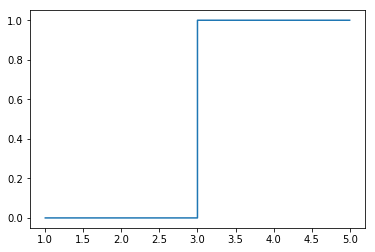

In [18]:
# This is the best I could get to a decent "approximation" of a step function
# with a threshold (bias) of 3
plt.plot([1,2,2.9999,3,4,5], [0,0,0,1,1,1])
plt.show()

Let's now insert a new input to our neuron. Our neuron now has two inputs $x_0$ and $x_1$, as shown below. You could think of our neuron as a function $f$ that depends on $x_0$ and $x_1$. If both $x_0 \in \mathbb{R}$ and $x_1 \in \mathbb{R}$ (i.e., if both $x_0$ and $x_1$ are real numbers), then you can think that our neuron is a function $f(x_0, x_1): \mathbb{R} \times \mathbb{R} \to \{0, 1\}$ (that is, a function that receives two real numbers and returns either 0 or 1).

![artificial_neuron_two_inputs](artificial_neuron_two_inputs.png "A sketch of the artificial neuron with two inputs")
<center>A sketch of the artificial neuron with only two inputs</center>

Now... how does this function look like? It would be helpful to take a look at some visualizations.

\[but first... a little detour...\]

In [19]:
# Little detour... creating synthetic data
zero_and_one = list(range(2))
print(zero_and_one)

# This creates a list of 3 items, where each item is the list [0, 1]
a = [zero_and_one] * 3
print(a)

[0, 1]
[[0, 1], [0, 1], [0, 1]]


One way in which we could take a look at this neuron is as a matrix. Let's say that our threshold $\theta = 4$. We could generate several combinations of values for $x_0$ and $x_1$ and see how the matrix looks like.

In the code below, $x_0$ and $x_1$ vary from 0 to 3. Then $out$ has 0 if the $x_0 + x_1 < 4$, and 1 otherwise. That is:

$$
out_{x_0,x_1} =
\begin{cases}
    0       & \quad \text{if } x_0 + x_1 < \theta\\
    1       & \quad \text{otherwise}
\end{cases}
$$

In [7]:
# Creates a 4x4 matrix. It has 0 whenever the sums of its index is
# smaller than a threshold (in this case, 4), and is 1 whenever
# the sum of the indexes is bigger than the threshold.
x_0 = [0, 1, 2, 3]
x_1 = [0, 1, 2, 3]
out = np.array([[0 if i+j < 4 else 1 for i in x_0] for j in x_1])
print(out)

[[0 0 0 0]
 [0 0 0 1]
 [0 0 1 1]
 [0 1 1 1]]


A nicer way to visualize this neuron is through some fancy 3D graph. The code below assumes that $\theta = 100$.

(I won't go into the details of how to make these 3D graphs -- I myself created this by looking at some random code in the internet --; but what matters is that you understand what it represents)

Text(0.5,0,'Y')

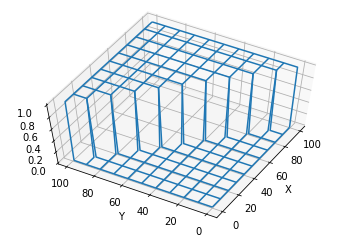

In [21]:
# Now let's create a fancy graph showing what happens when the neuron has two
# inputs.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# This will create a list [0, 1, ..., 98, 99]
from_zero_to_99 = list(range(100))

# X is a matrix where each row is a list [0, 1, ..., 98, 99]
X = np.array([from_zero_to_99] * 100)

# Y is a matrix where each column is a list [0, 1, ..., 98, 99]
Y = np.array([from_zero_to_99] * 100).T

# Z is a matrix created just like the 4x4 matrix above, for each of the values of
# X and Y above
Z = np.array([[0 if i+j < 100 else 1 for i in range(100)] for j in range(100)])

# This changes the angle of the graph
ax.view_init(60, 210)

# Finally, we create the plot
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

# Insert labels
plt.xlabel("X")
plt.ylabel("Y")

As you can see, the neuron divides the 2D space into two parts: one for which it outputs 0, and another one for which it outputs 1. In the 1D case, this division was a point; in the 2D case, this division was a line. In the 3D case, the division would be a plane, and so on.

In more fancy terms, for $n$ inputs, the neuron divides the $n$-dimensional space into two parts along an $(n-1)$-dimensional hyperplane. When $\theta = 0$, this hyperplane crosses the origin -- i.e., the point (0, 0, ..., 0).

Adding weights
--------------

Now let's add some more complexity to the neuron. Let's add weights between the inputs $x_i$ and the neuron, and let's call these weights $w_i$. For example:

![artificial_neuron_two_inputs_with_weights](artificial_neuron_two_inputs_with_weights.png "A sketch of the artificial neuron with two inputs")
<center>A sketch of the artificial neuron with only two inputs and weights</center>

You can think of the weights as the "synapses" of the neurons. A big weight could be an "excitatory" connection between the input (another neuron) and the current neuron; a small weight could be an "inhibitory" connection between them. Importantly, the weights are also real number (i.e., $w_i \in \mathbb{R}$).

Now we need to update the aggregation function to take into account the weights. Normally, we simply make it multiply each $x_i$ by its corresponding $w_i$. That is, for our example with two neurons, it would calculate $x_0 \times w_0 + x_1 \times w_1$.

What difference does it make? Let us put some numbers and see for ourselves. Say $w_0 = 0.5$ and $w_1 = 2$. We will compute the exact same graph as before, but now taking into account the weights:

Text(0.5,0,'Y')

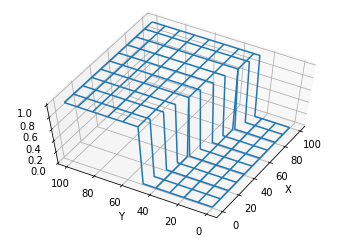

In [22]:
# Now let's create a fancy graph showing what happens when the neuron has two
# inputs.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# skipping the definition of X and Y, because they are already calculated in the
# code above

# Z is a matrix created just like the 4x4 matrix above, for each of the values of
# X and Y above
# -------> THE DIFFERENCE IS IN THIS LINE!!! <-------
Z = np.array([[0 if i*0.5 + j*2 < 100 else 1 for i in range(100)] for j in range(100)])

# This changes the angle of the graph
ax.view_init(60, 210)

# Finally, we create the plot
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

# Insert labels
plt.xlabel("X")
plt.ylabel("Y")

And what if the weights were $w_0 = 0.1$ and $w_1 = 10$, and the bias were $\theta$ = 200?

Text(0.5,0,'Y')

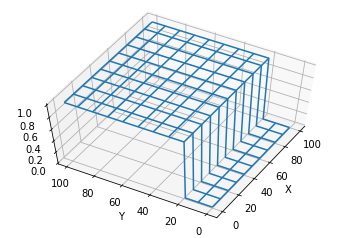

In [23]:
# Now let's create a fancy graph showing what happens when the neuron has two
# inputs.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# skipping the definition of X and Y, because they are already calculated in the
# code above

# Z is a matrix created just like the 4x4 matrix above, for each of the values of
# X and Y above
# -------> THE DIFFERENCE IS IN THIS LINE!!! <-------
Z = np.array([[0 if i*0.1 + j*10 < 200 else 1 for i in range(100)] for j in range(100)])

# This changes the angle of the graph
ax.view_init(60, 210)

# Finally, we create the plot
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

# Insert labels
plt.xlabel("X")
plt.ylabel("Y")

As you can see, by changing the weights and the bias it is possible to make the $(n-1)$-dimensional hyperplane (the line in the graphs above) cross any possible place.

In other words, a neuron and $n$ inputs with weights is capable of *linearly* dividing the $n$-dimensional space in any possible conceivable way. Keep this information in mind. It will be useful soon...

Ok, but, so what?
-------------------

Ok... so a neuron can linearly divide the input space into two parts. But how is this useful?

To understand better how this is useful, we want to go back to the topic of the last class: Machine Learning. Say you are learning about some language and, by observing this language, you came up with the following hypothesis: for any sentence, when the subject has a case marking, then the sentence is long and has few prepositions; when the subject doesn't have a case marking, then the sentence is short and has many prepositions. Let's say you collected several sentences from this language, and made a graph. For example, the graph could be the following: _(ignore the lines for now)_

![neuron_as_svm](neuron_as_svm.svg "2D data")
<center>Variable $X_1$ represents the sentence length, and variable $X_2$ represents the number of prepositions. White dots represent sentences whose subject has case markings; black dots represent sentences where the subject does not have case markings.<br>Created by: [ZackWeinberg](https://commons.wikimedia.org/w/index.php?title=User:ZackWeinberg) (link doesn't seem to exist anymore)</center>

Very well, it looks like your hypothesis was right. Now imagine that you were given a new pair `(length, number of prepositions)` and were asked to decide if the sentence represented by this pair should have case markings or not. Hopefully, you just put the new dot in the graph above, and check to which of the two groups it is closest to. Then you would just say that the _class_ to which it belongs is the same as the _class_ of the dots that are closest to it. For example, if your new pair were close to the black dots, then it would probably be a black dot too; if your new pair were close to the white dots, then it would probably be a white dot too.

But what if it were just in the middle between the other dots? Well, in that case, you might not be so sure. For this reason, you would like to define a "boundary" between the two classes.

In the graph above, you can see 3 "boundaries" $H_1$, $H_2$ and $H_3$. It is very easy to notice that both boundaries $H_1$ and $H_2$ are not very useful: they don't work even for the points you already have. But boundary $H_3$ is different: it is a boundary that stays right in between the two classes of dots. As you can see, this boundary divides the 2-dimensional space into two parts: one part that is associated with the class "subject has case marking", and another part that is associated with the class "subject doesn't have case marking". An artificial neuron is useful because, as we saw before, it is one way in which we can define such a boundary.

But what if the boundary is not a line?
---------------------------------------

With more dimensions, it is actually possible to make boundaries that do not seem to be linear when projected into fewer dimensions. For example, consider the following function:

$$
out_{x_0} =
\begin{cases}
    0       & \quad \text{if } x_0 < 2 \quad \text{ or } \quad x_0 \geq 4\\
    1       & \quad \text{otherwise}
\end{cases}
$$

A graph of this function would look like the following:

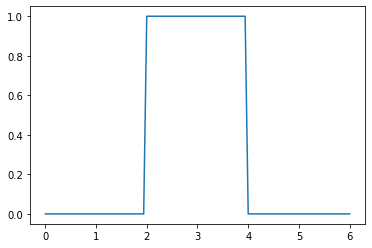

In [33]:
x = np.linspace(0, 6, 100)
y_cond1 = x >= 2
y_cond2 = x <  4
y = [i and j for i,j in zip(y_cond1, y_cond2)]
plt.plot(x, y)

Now... it doesn't matter how much you try, it is impossible to find a way to cut the $x$-axis such that to one side you get elements of class 0 and to the other side you get elements of class 1. The analogous case in 2D would be concentric circles: (or, in the example below, concentric squares)

In [76]:
coordinates = np.linspace(0, 6, 20)
x = np.array([(i, j) for i in coordinates for j in coordinates])

# Conditions
y_cond1 = x[:, 0] >= 2
y_cond2 = x[:, 0] <  4
y_cond3 = x[:, 1] >= 2
y_cond4 = x[:, 1] <  4

# Gets colors
reds = np.array([i and j and k and l for i,j,k,l in zip(y_cond1, y_cond2, y_cond3, y_cond4)])
blues = reds == False

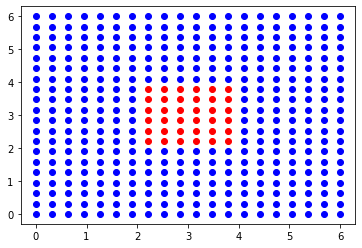

In [77]:
plt.plot(x[reds][:, 0], x[reds][:, 1], 'ro')
plt.plot(x[blues][:, 0], x[blues][:, 1], 'bo')

Now... what if, however, I could "pull" this 2D example into a 3D space where all the reds have a different height than all the blues? For example...

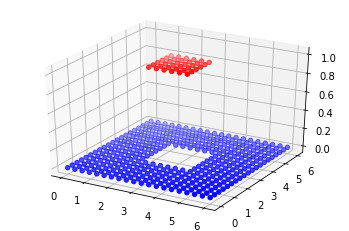

In [83]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[reds][:, 0], x[reds][:, 1],   1, c='r', marker='o')
ax.scatter(x[blues][:, 0], x[blues][:, 1], 0, c='b', marker='o')

Now I can easily pass a plane between the two types of data points. When I finally project these back into the original 2D space, I will have a boundary that looks like a square. This boundary, however, was created linearly in a higher-dimensional space.

If you really are interested in more information, there is an **awesome** blog post from Christopher Olah about this [here](http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/) (it is where I took the idea for these images from).

Layers of neurons
-----------------

Ok... there is a lot (A LOT) more to know about the artificial neuron alone, but we probably should proceed.

In the last subsection, we looked at how one neuron could divide a lower dimensional space into something that does not look like a line. There is another way to do this: having many neurons.

![universal_approximator](universal_approximator.png "With an unlimited amount of neurons, I can always approximate any curve.")

As you can see in the image above, in the 2D space, having many neurons allows us to draw several lines across the space. Now, if you wanted to classify a new dot that appeared close to the blue dots, it would be enough to check if all neurons have fired (i.e., if the dot is to the "correct" side of all lines).

Now... when a neuron has fired, it outputs a 1. Thus, of course, when $k$ neurons have fired, each of the several neurons outputs a 1. If we summed the output of $k$ neurons, we would know that all of them have fired if this sum equals $k$. Based on the discussion above, you should have already realized that a good function for "taking decisions" is the _step function_. And something that sums all the inputs and outputs a "decision" is precisely the topic of this entire text (i.e., the artificial neuron). So, well, it seems that implementing this decision is as easy as putting a neuron with threshold $k$ receiving as input the output of all the $k$ neurons:

![universal_approximator2](universal_approximator2.png "Architecture of the Universal Approximator.")

Given a big enough number of lines, it is possible to use this procedure to approximate any shape. For this reason, a Neural Network with two layers and an unlimited number of neurons is said to be a _Universal Approximator_.

Training
--------

So far, our discussion has been much more about how _possible_ something is, and much less about _how_ to do it. We have discussed that, with one neuron, it is _possible_ to divide an $n$-dimensional space into two parts, and that it is _possible_ to use this for classification.

But _how_ can we train the neurons? Actually, the answer was already given before: with Gradient Descent!

The step function is not convenient in that its derivative is 0 most of the time, and is infinite only in one specific point. For this reason, instead of using the step function as the activation function, we use the Logistic Function, which outputs a number between 0 and 1 (as in the Logistic Regression).

Our goal is to use Gradient Descent to update the weight vector $\mathbf{w}$ associated with each neuron, as well as its bias. Let's consider how the equation for the case with one neuron would look like:

$$
\mathbf{y} = \sigma(\mathbf{w}\mathbf{x} + b) + \boldsymbol{\epsilon}
$$

This is the exact same equation as in Logistic Regression! (with the difference that the $A$ changed into $\mathbf{w}$.) This means that each neuron is performing Logistic Regression!

As you will see in the next classes, stacking layers of neurons, each of which is performing Logistic Regression in the previous layer, is the basic idea of the Neural Network models. ([I wrote a possibly interesting blog post on this some time ago that might be useful](https://jcbgamboa.github.io/2017/09/09/representation-learning-101/))

## What is next?

In the next classes, we will apply these concepts to some more "Linguisticky" tasks...